In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import time
from copy import copy

#from numba import int64

# #for 3d plots
# from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
# from mpl_toolkits.mplot3d import Axes3D
# #for 3d plots
# import matplotlib.animation as animation

#for saving simulations
# import pickle

from sim_handling import Simulation
from diffusionstuff7 import f0d,f1d,f2d

C:\Users\Max-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\llvmlite\llvmpy\__init__.py:3: UserWarning: The module `llvmlite.llvmpy` is deprecated and will be removed in the future.
  warnings.warn(
C:\Users\Max-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\llvmlite\llvmpy\core.py:8: UserWarning: The module `llvmlite.llvmpy.core` is deprecated and will be removed in the future. Equivalent functionality is provided by `llvmlite.ir`.
  warnings.warn(
C:\Users\Max-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\llvmlite\llvmpy\passes.py:17: UserWarning: The module `llvmlite.llvmpy.passes` is deprecated and will be removed in the future. If you are using this code, it should be inlined into your own project.
  warnings.warn(


In [2]:
%matplotlib widget

In [3]:
f1d_sim = Simulation(f1d, (500,), rtol=1e-12)

In [4]:
f1d_sim.layermax = 100
f1d_sim.run()

0 0 1.477584881781624e-05 1.477584881781624e-05
157 1 0.06962967123254771 0.06961489538372989
314 2 0.4466862212441556 0.37705655001160787
472 3 0.650260406491594 0.20357418524743842
630 4 0.7426642162407049 0.09240380974911089
787 5 0.7956444457941441 0.05298022955343917
945 6 0.8260688160199487 0.030424370225804687
1102 7 0.8484941539688355 0.022425337948886792
1260 8 0.8650982613639293 0.01660410739509377
1417 9 0.8789285695407667 0.013830308176837391
1575 10 0.8910858339466561 0.012157264405889379
1732 11 0.9021115990693183 0.011025765122662179
1890 12 0.9130876733180653 0.010976074248747025
2047 13 0.9239695566967203 0.010881883378655033
2205 14 0.9358075625280975 0.011838005831377174
2363 15 0.9487696913370431 0.01296212880894565
2520 16 0.9636420200207283 0.014872328683685154
2678 17 0.9801784498908788 0.01653642987015047
2835 18 0.9962487485323059 0.016070298641427172
2993 19 1.0253624890685238 0.029113740536217847
3151 20 1.3024920328826894 0.27712954381416566
3308 21 1.604916

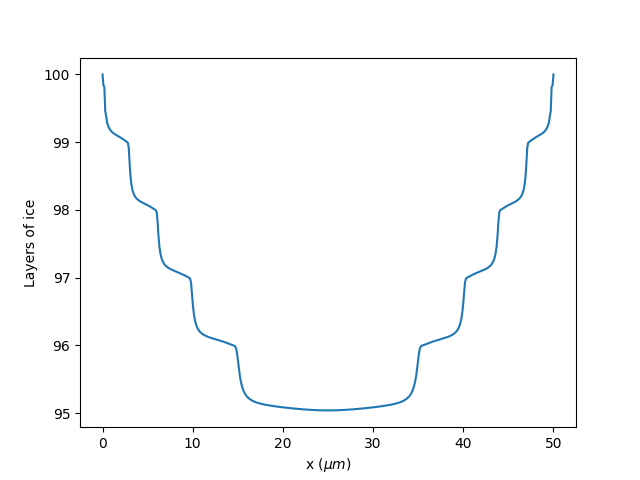

In [5]:
f1d_sim.plot()

In [11]:
for k,v in f1d_sim._extra_vars.items():
    print(k,v)
print('center reduction %: ', f1d_sim.center_reduction)

Nbar 1.0
Nstar 0.1432394487827058
D 0.0002
dtmax 50.20060160400962
dtmaxtimefactor 50
nu_kin 49
deprate 0.16333333333333333
sigma0 0.19
sigmastepmax 0.2
c_r 0.005
niter 1
t0 0.0
DoverdeltaX2 0.01992008
nx 500
xmax 50
deltaX 0.10020040080160321
center reduction %:  0.5


In [6]:
test_f2d_sim = Simulation(f2d, (500,500), rtol=1e-12)
test_f2d_sim.layermax = 5

In [7]:
#test_f2d_sim.countermax_0D
#test_f2d_sim.countermax_1D
#test_f2d_sim.countermax_2D
#test_f2d_sim.atol
#test_f2d_sim.rtol
#test_f2d_sim.deltaT
#test_f2d_sim.float_params
#test_f2d_sim.animate()
#test_f2d_sim.run()

In [8]:
num_steps = len(test_f2d_sim.results()['t'])
#shape of results is (num_steps, 2, nx, ny)
Fliq, Ntot = [],[]
for step in range(num_steps):
    next_Fliq, next_Ntot = test_f2d_sim._results['y'][step]
    Fliq.append(next_Fliq)
    Ntot.append(next_Ntot)    
Fliq,Ntot = np.array(Fliq), np.array(Ntot)
Nice = Ntot - Fliq
#shape of fliq, ntot and nice should be (num_steps, nx, ny)

#access coordinate arrays for plotting
xs, ys = np.meshgrid(test_f2d_sim.x, test_f2d_sim.y)

KeyError: 'DoverdeltaY2'

In [ ]:
print(num_steps)
print(test_f2d_sim.steepness(0,slice(0,test_f2d_sim.shape[0]//2)))

In [ ]:
print(test_f2d_sim.get_step_density(0,slice(0,test_f2d_sim.shape[0]//2)))  